# Plotting Spinodal 

We have figured out how to plot the phase diagram of regular solution model when $\Omega$ > 0 i.e positive. 
Now we want to plot the spinodal line on the same curve. 

To do that we are going to define a function which is the second derivate of the non dimensionalized free energy change i.e 

> $\Delta$G ' ' = - 2$\alpha$ + 1/x + 1/ (1-x)

> where $\alpha$ = non dimensionalized regular solution parameter

In [0]:
# ----- Below Code Generates Phase Diagram of Regular Solution ------ #
# importing libraries
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

x = np.arange(0.001, 1.000, step = 0.001) 
# x array contains composition %

a = np.zeros(400)
a[0] = 2.0
a_step = 0.1

for i in range(0, 399, 1):
    a[i+1] = a[i] + a_step

DG = np.zeros(999)
x_min = np.zeros((2,400)) 
# defining 2 arrays of same length to store minima values


for i in range(0,400,1) :
    for j in range(0,999,1) :
       
        DG[j] = a[i] * x[j] * (1 - x[j]) + x[j] * np.log(x[j]) + (1 - x[j]) * np.log(1 - x[j])
    
    x_min[ 0, i ] = x[ np.argmin( DG[ :500 ] ) ] 
    # stores x values of minina left of 0.5
    x_min[ 1, i ] = x[ np.argmin( DG[ 500 :] ) ] 
    # stores x values of minima right of 0.5   

Next we need to define the second derivative function and find it's zeros, as we know G'' = 0 is where spinodal lies. 

In [0]:
from scipy.optimize import brentq

We need to find the two zeros for 400 temperatures between 2 intervals, one left of x = 0.5 and the other right of  x = 0.5.

Text(0.5, 1.0, 'T vs X')

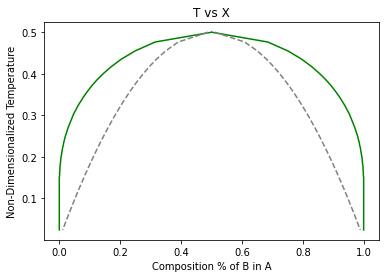

In [11]:
# ------- Plotting Spinodal ---------

a[0] = 2.001 
# we redefine as we need to create 2 intervals of x
    
roots = np.zeros( ( 2,400 ) ) 
# defining 2 arrays of same length to store roots for each temperature 

for i in range(0, 400, 1) :
    def GPP(x):
        return -2 * a[i] + (1 / x) + 1 / (1-x)
        # for each temperature
    roots [ 0, i] = brentq (GPP, 0.0001, 0.5001) 
    # we tried to avoid 0.5 in previous case but here we include
    roots [ 1, i] = brentq (GPP, 0.4999, 0.9999)
    # the intervals are such that one zeros is enclosed within each

temp = 1 / a 

# plotting the results 
plt.plot(x_min[0, :], temp, color = "green")
plt.plot(x_min[1, :] + 0.5, temp, color = "green")
plt.plot(roots[0, :], temp, color = "grey", linestyle = "dashed")
plt.plot(roots[1, :], temp, color = "grey", linestyle = "dashed")
plt.xlabel ("Composition % of B in A")
plt.ylabel ("Non-Dimensionalized Temperature")
plt.title("T vs X")

As we can see, the dashed curve is the spinodal. 

The green curve in the phase diagram is giving the region where the phase seperation is goingt o take place. 

The region below the green curve and dashed curve is showing us the meta-stable region and the region below grey dashed curve gives you the unstable region.